In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
#plt.title('테스트')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

In [4]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


## 필요없는 열 삭제

In [5]:
df.drop(['Product Description', 'Order Zipcode', 'Product Image', 'Customer Email', #'Customer Fname', 'Customer Lname', 
             'Customer Password', 'Customer Street', 'Product Image','Customer Zipcode'], axis=1, inplace = True)

## 중복 열 삭제

In [6]:
df.drop(['Benefit per order','Order Item Total','Department Id', 'Order Item Cardprod Id', 'Product Category Id', 
         'Product Card Id','Order Customer Id','Order Item Product Price','Order Item Id'], axis=1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Id                    180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer Fname                 180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Lname                

In [8]:
from datetime import datetime, timedelta

datetime_val = datetime.strptime('2017-10-02 12:46:00', '%Y-%m-%d %H:%M:%S')
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

df = df[(df["order date (DateOrders)"]<=datetime_val)]

In [9]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,...,Sales,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
48,PAYMENT,5,2,115.180000,Late delivery,1,17,Cleats,Bayamon,Puerto Rico,...,119.980003,-30.750000,South Asia,Uttar Pradesh,PENDING_PAYMENT,Perfect Fitness Perfect Rip Deck,59.990002,0,2016-02-29 13:57:00,Second Class
49,PAYMENT,2,2,79.180000,Shipping on time,0,29,Shop By Sport,Caguas,Puerto Rico,...,79.980003,-122.730003,West Asia,Bursa,PENDING_PAYMENT,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,2016-10-27 14:39:00,Second Class
50,PAYMENT,6,2,96.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,...,100.000000,33.599998,Oceania,Australia del Sur,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,2016-04-05 04:37:00,Second Class
51,PAYMENT,2,2,75.980003,Shipping on time,0,29,Shop By Sport,Caguas,Puerto Rico,...,79.980003,24.690001,West Asia,Estambul,PENDING_PAYMENT,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,2016-11-01 01:31:00,Second Class
52,PAYMENT,3,2,91.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,...,100.000000,9.100000,Eastern Asia,Ulán Bator,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,2016-12-01 01:18:00,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,...,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 03:40:00,Standard Class
180515,DEBIT,3,2,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,...,399.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-19 01:34:00,Second Class
180516,TRANSFER,5,4,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,...,399.980011,141.110001,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20 21:00:00,Standard Class
180517,PAYMENT,3,4,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,...,399.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-18 20:18:00,Standard Class


## Data info 추가

In [10]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))
data_info(df)

1) Number of columns are :  37
2) Number of rows are :  172199
3) Total number of data-points : 6371363
4) Count of Numerical Features : 19
5) Count of Categorical Features : 18


## 결측 info추가

In [11]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')
            
features_with_missing_values(df)

Percentage of Total Missing Values is  0.0 %
Missing Value Estimation :


## Heatmap

C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\82102\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


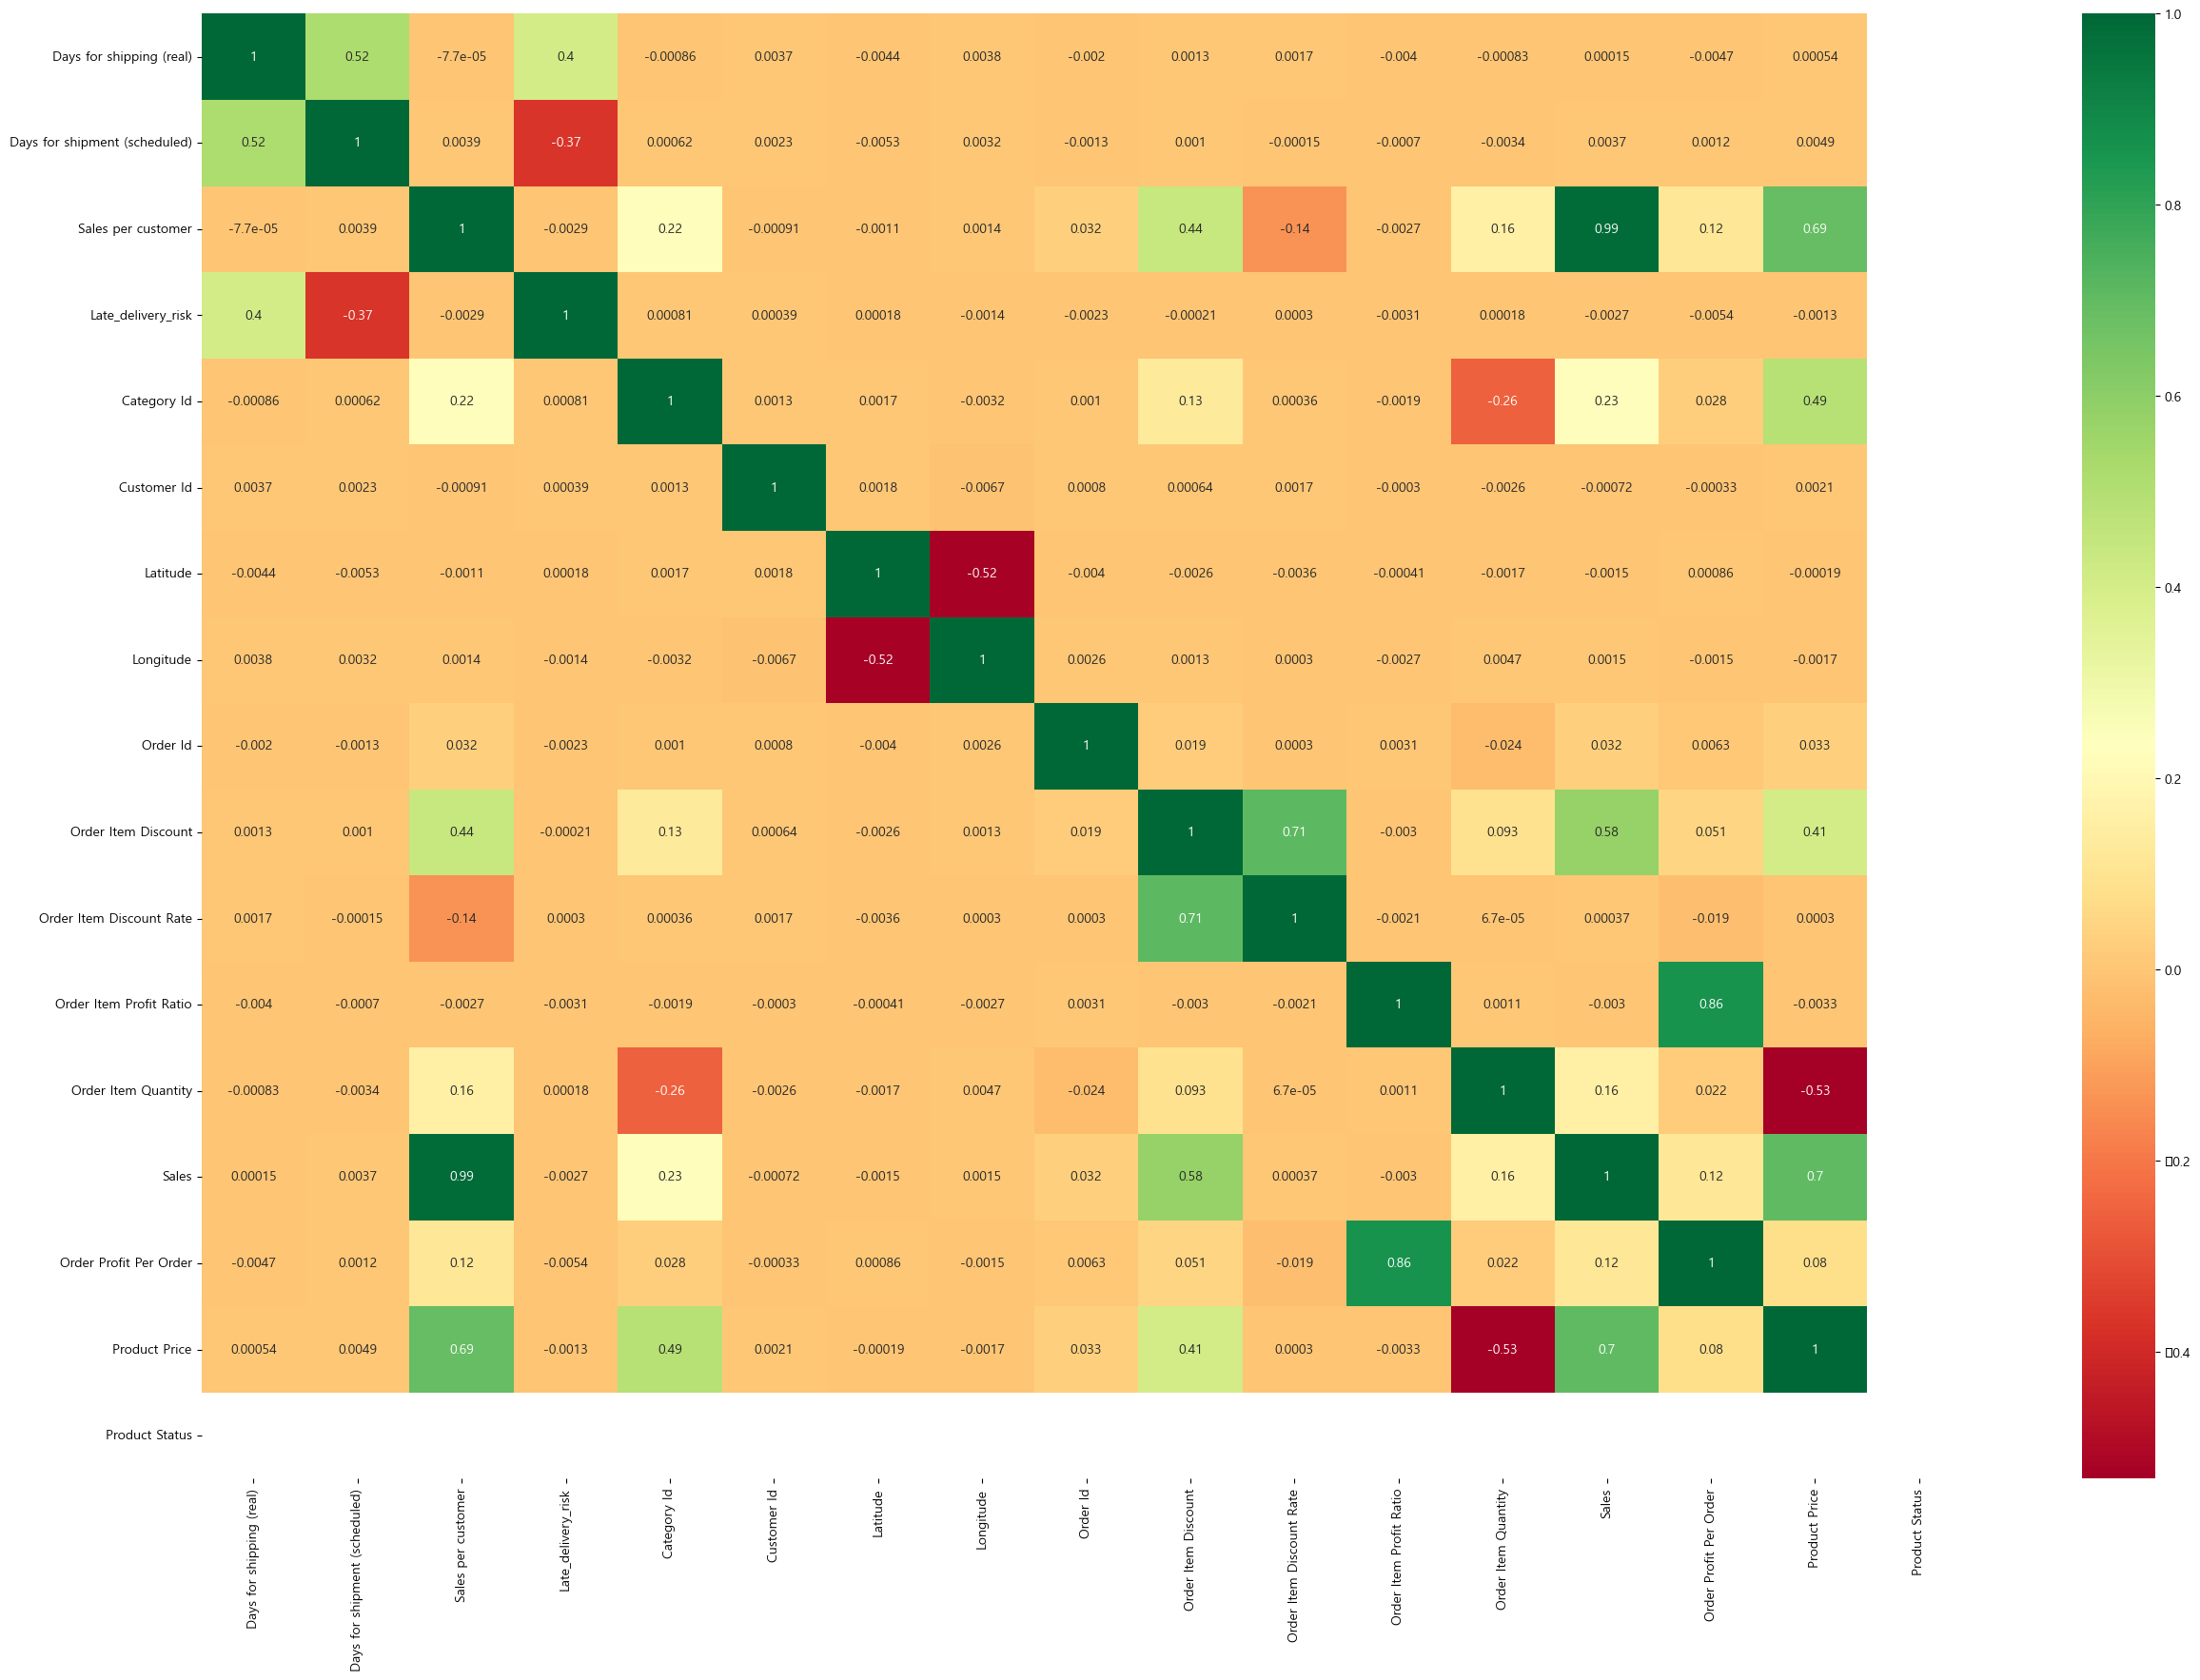

In [12]:
# 수치형 변수만 선택
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# 수치형 변수들의 상관관계 매트릭스 계산
corrmap = numerical_df.corr()

# 상관관계가 높은 변수들의 목록을 얻음
top = corrmap.index

# 상관관계 히트맵 그리기
plt.figure(figsize=(30,20))
g = sns.heatmap(df[top].corr(), annot=True, cmap="RdYlGn")

In [13]:
df.to_csv('data_pre.csv', index=False, encoding='UTF-8-sig')

In [32]:
pd.set_option('display.max_columns',None)
df[df['Customer Id'] == 8648]

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
96391,DEBIT,2,1,124.790001,Late delivery,1,18,Men's Footwear,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Apparel,36.319332,-119.296081,LATAM,Soyapango,El Salvador,2017-06-02 01:23:00,60494,5.200000,0.04,0.34,1,129.990005,42.180000,Central America,San Salvador,COMPLETE,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,2017-06-04 01:23:00,First Class
97035,DEBIT,2,1,494.950012,Late delivery,1,9,Cardio Equipment,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Footwear,36.319332,-119.296081,LATAM,Soyapango,El Salvador,2017-06-02 01:23:00,60494,5.000000,0.01,0.48,5,499.950012,237.580002,Central America,San Salvador,COMPLETE,Nike Men's Free 5.0+ Running Shoe,99.989998,0,2017-06-04 01:23:00,First Class
98498,DEBIT,5,4,263.980011,Late delivery,1,43,Camping & Hiking,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Fan Shop,36.319332,-119.296081,Africa,Johannesburg,SudAfrica,2016-11-16 23:44:00,46994,36.000000,0.12,0.02,1,299.980011,5.810000,Southern Africa,Gauteng,ON_HOLD,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,2016-11-21 23:44:00,Standard Class
98499,DEBIT,5,4,260.980011,Late delivery,1,43,Camping & Hiking,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Fan Shop,36.319332,-119.296081,Africa,Johannesburg,SudAfrica,2016-11-16 23:44:00,46994,39.000000,0.13,-0.02,1,299.980011,-5.220000,Southern Africa,Gauteng,ON_HOLD,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,2016-11-21 23:44:00,Standard Class
100459,DEBIT,3,4,142.440002,Advance shipping,0,46,Indoor/Outdoor Games,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Fan Shop,36.319332,-119.296081,USCA,Redlands,Estados Unidos,2016-06-16 23:25:00,36512,7.500000,0.05,0.31,3,149.940002,44.580002,West of USA,California,ON_HOLD,O'Brien Men's Neoprene Life Vest,49.980000,0,2016-06-19 23:25:00,Standard Class
113913,DEBIT,2,4,44.980000,Advance shipping,0,46,Indoor/Outdoor Games,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Fan Shop,36.319332,-119.296081,LATAM,Córdoba,Argentina,2015-02-22 04:28:00,3576,5.000000,0.10,0.06,1,49.980000,2.830000,South America,Córdoba,COMPLETE,O'Brien Men's Neoprene Life Vest,49.980000,0,2015-02-24 04:28:00,Standard Class
146525,DEBIT,5,4,395.980011,Late delivery,1,45,Fishing,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Fan Shop,36.319332,-119.296081,Africa,Johannesburg,SudAfrica,2016-11-16 23:44:00,46994,4.000000,0.01,0.48,1,399.980011,190.070007,Southern Africa,Gauteng,ON_HOLD,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-11-21 23:44:00,Standard Class
152026,DEBIT,3,4,327.980011,Advance shipping,0,45,Fishing,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Fan Shop,36.319332,-119.296081,USCA,Redlands,Estados Unidos,2016-06-16 23:25:00,36512,72.000000,0.18,0.47,1,399.980011,154.149994,West of USA,California,ON_HOLD,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-06-19 23:25:00,Standard Class
162791,DEBIT,2,4,109.190002,Advance shipping,0,18,Men's Footwear,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Apparel,36.319332,-119.296081,LATAM,Córdoba,Argentina,2015-02-22 04:28:00,3576,20.799999,0.16,0.06,1,129.990005,6.440000,South America,Córdoba,COMPLETE,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,2015-02-24 04:28:00,Standard Class
163680,DEBIT,3,4,44.990002,Advance shipping,0,17,Cleats,Visalia,EE. UU.,Janice,8648,Montgomery,Home Office,CA,Apparel,36.319332,-119.296081,USC